# Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# DataFrame / Missing Value

In [2]:
data = pd.read_csv("nepal-earthquake-severity-index-latest (1).csv")
data

,P_CODE,VDC_NAME,DISTRICT,REGION,Hazard (Intensity),Exposure,Housing,Poverty,Vulnerability,Severity,Severity Normalized,Severity category
0,C-BAG-27-031,KathmanduN.P.,Kathmandu,Central,2.17,10.00,8.86,1.82,5.34,4.88,10.0000,Highest
1,C-BAG-25-027,LalitpurN.P.,Lalitpur,Central,1.72,2.26,8.40,0.82,4.61,2.62,5.3707,Highest
2,C-NAR-35-005,BharatpurN. P.,Chitawan,Central,2.21,1.47,5.38,2.53,3.96,2.34,4.8083,Highest
3,C-BAG-26-012,MadhyapurThimiN.P.,Bhaktapur,Central,2.45,0.85,8.23,0.89,4.56,2.12,4.3447,Highest
4,C-BAG-27-028,Jorpati,Kathmandu,Central,1.91,0.87,8.86,1.82,5.34,2.07,4.2407,Highest
...,...,...,...,...,...,...,...,...,...,...,...,...
3980,F-SET-69-076,Khaptad National Par,Achham,Far-Western,0.00,0.00,8.45,9.21,8.83,0.00,0.0000,Lowest
3981,F-SET-70-052,Khaptad National Park,Doti,Far-Western,0.00,0.00,8.77,8.26,8.52,0.00,0.0000,Lowest
3982,M-BHE-58-033,Royal Bardiya Nation,Bardiya,Mid-Western,0.00,0.00,4.64,4.82,4.73,0.00,0.0000,Lowest
3983,W-LUM-48-075,Royal Chitawan Natio,Nawalparasi,Western,0.84,0.00,5.61,3.51,4.56,0.00,0.0000,Lowest


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hazard (Intensity),3985.0,0.320537,0.779937,0.00,0.0000,0.0100,0.1300,10.00
Exposure,3985.0,0.067493,0.187551,0.00,0.0300,0.0500,0.0700,10.00
Housing,3985.0,5.706522,1.953037,1.17,4.6400,5.6100,6.8500,9.94
Poverty,3985.0,5.481854,2.270975,0.00,3.3300,5.6200,7.3500,10.00
Vulnerability,3985.0,5.594635,1.450817,1.62,4.5900,5.5500,6.6600,8.83
Severity,3985.0,0.248720,0.298756,0.00,0.0500,0.1400,0.3600,4.88
Severity Normalized,3985.0,0.510221,0.612652,0.00,0.0941,0.2862,0.7448,10.00


In [4]:
data.isnull().sum()

P_CODE                 0
VDC_NAME               0
DISTRICT               0
REGION                 0
Hazard (Intensity)     0
Exposure               0
Housing                0
Poverty                0
Vulnerability          0
Severity               0
Severity Normalized    0
Severity category      0
dtype: int64

In [5]:
data.duplicated().sum()

0

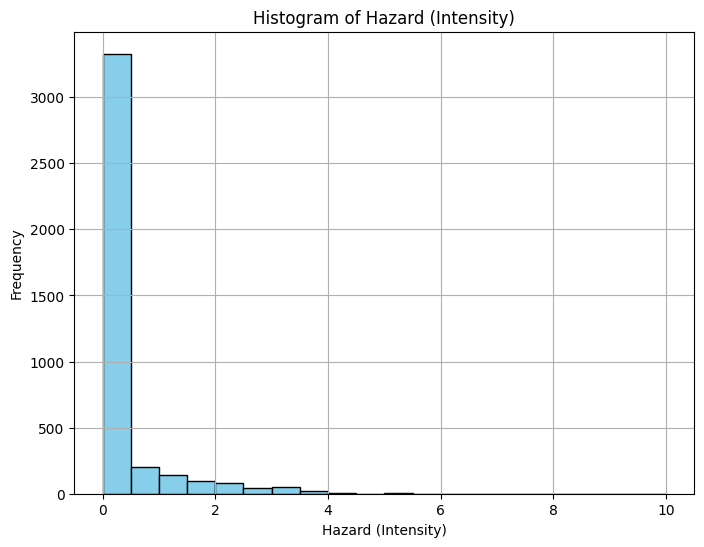

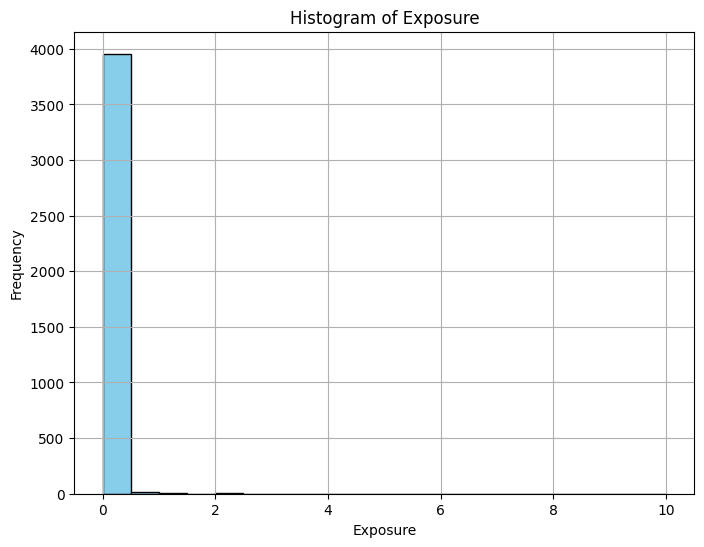

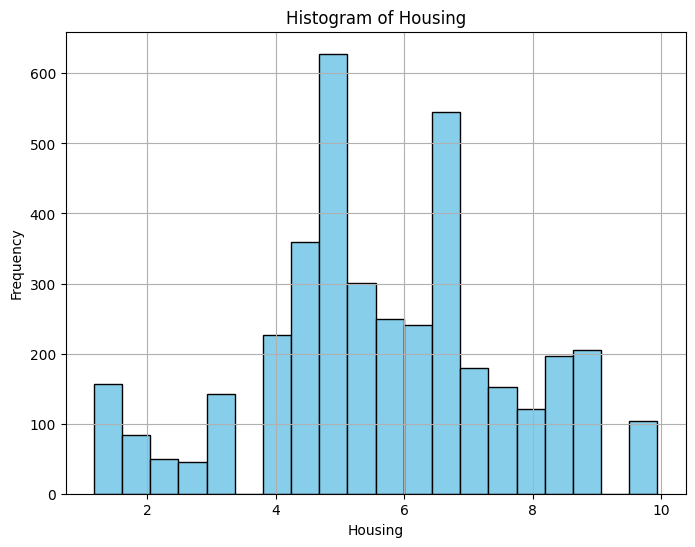

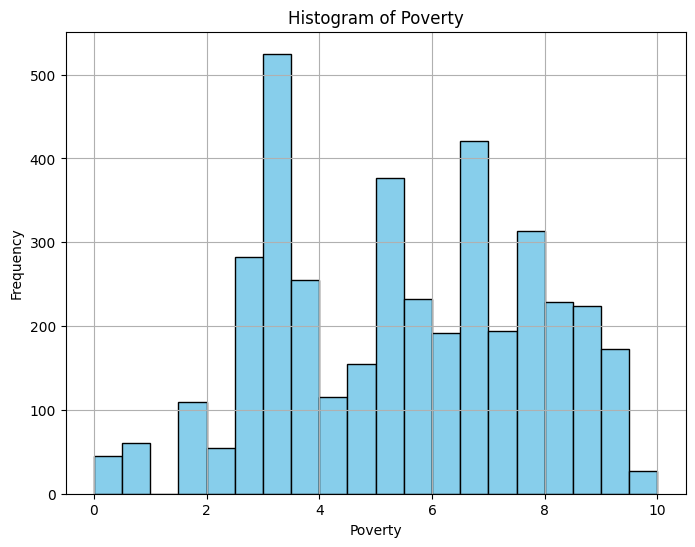

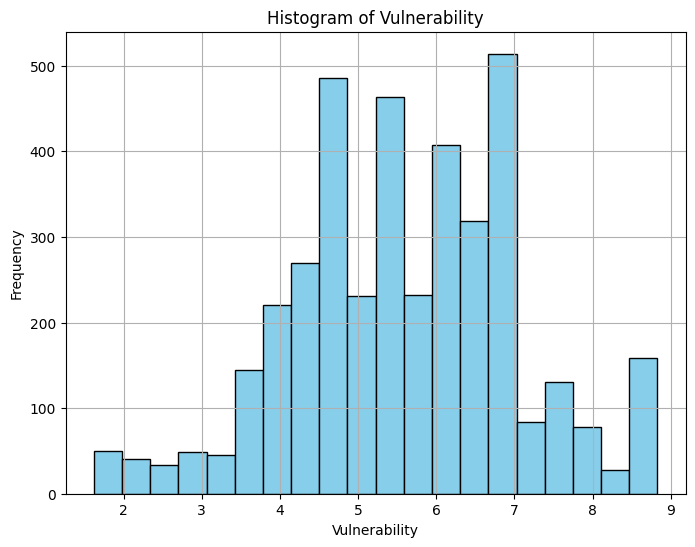

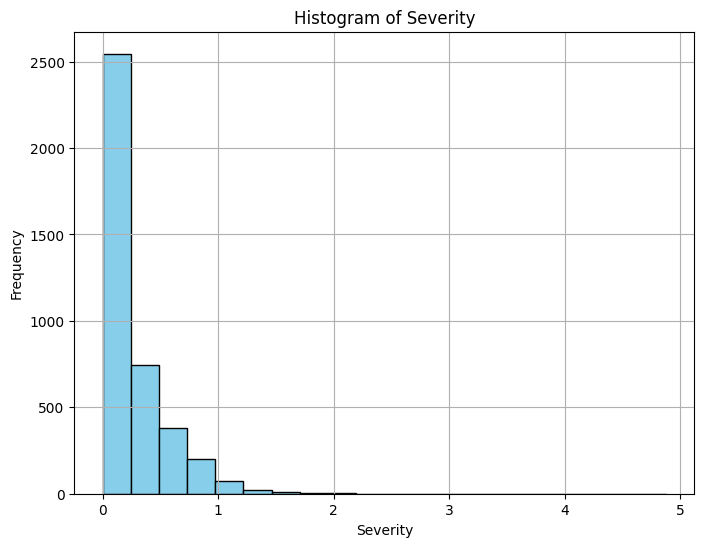

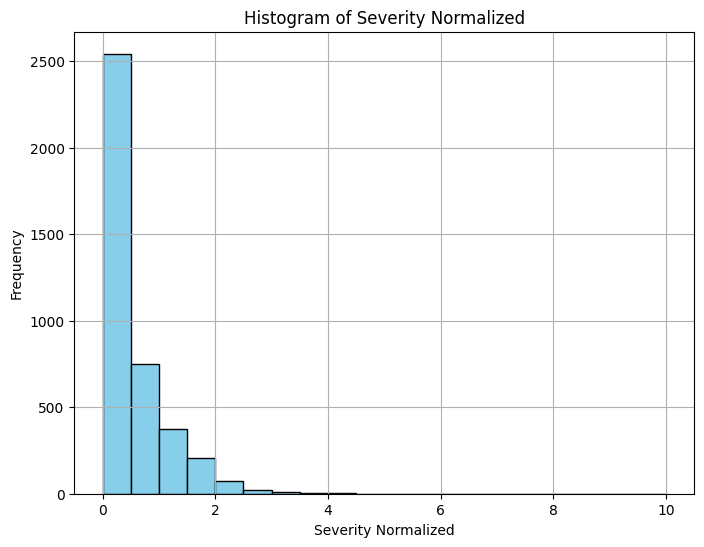

In [6]:
# Memilih kolom yang ingin divisualisasikan sebagai histogram
columns_for_histogram = ['Hazard (Intensity)', 'Exposure', 'Housing', 'Poverty', 'Vulnerability', "Severity", "Severity Normalized"]

# Membuat histogram untuk setiap kolom secara terpisah
for column in columns_for_histogram:
    plt.figure(figsize=(8, 6))
    plt.hist(data[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

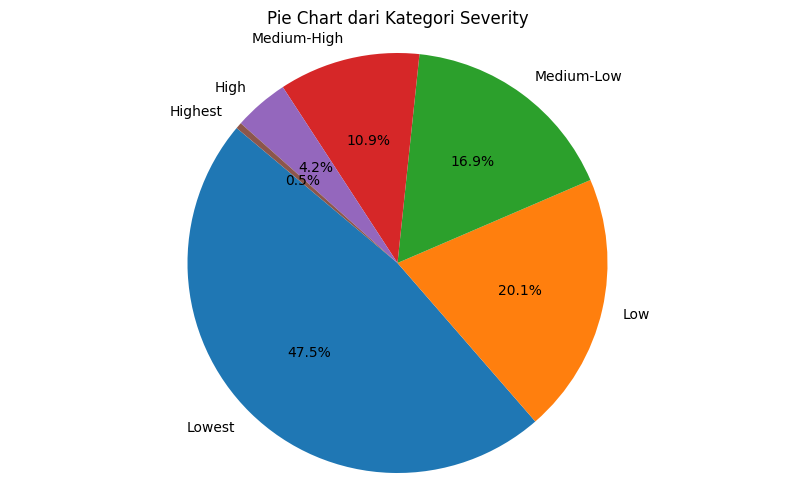

In [7]:
# Menghitung jumlah kemunculan setiap kategori pada kolom 'Severity category'
severity_counts = data['Severity category'].value_counts()

# Membuat pie chart
plt.figure(figsize=(10, 6))
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart dari Kategori Severity')
plt.axis('equal')  # Memastikan lingkaran memiliki aspek yang sama
plt.show()

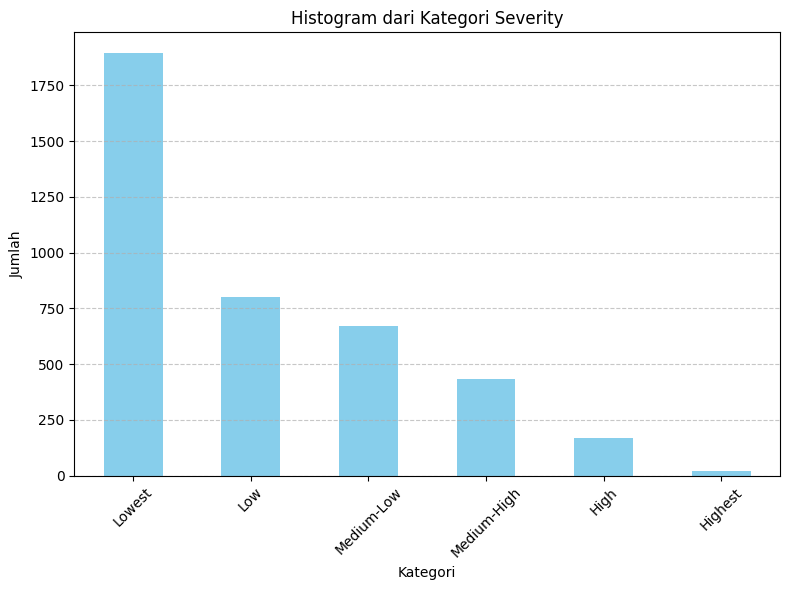

In [8]:
# Membuat histogram
plt.figure(figsize=(8, 6))
data['Severity category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Histogram dari Kategori Severity')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)  # Mengatur label sumbu x agar lebih mudah dibaca
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Mengatur layout agar tidak tumpang tindih
plt.show()

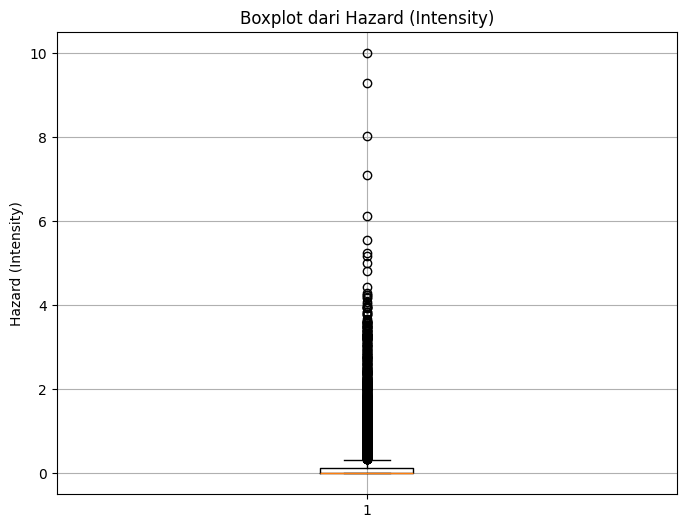

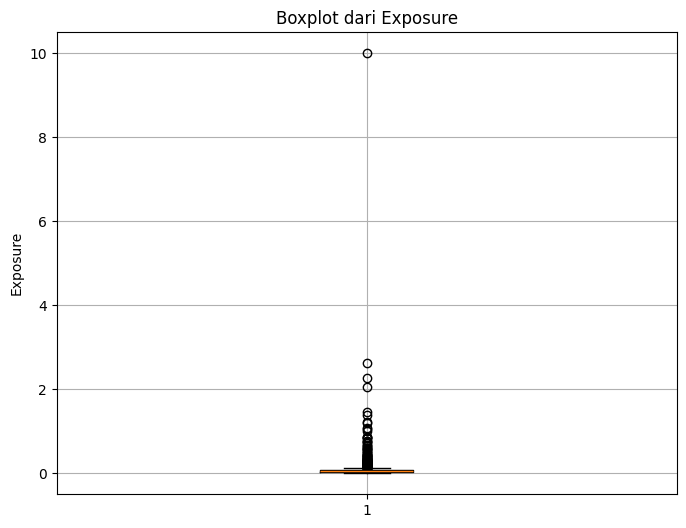

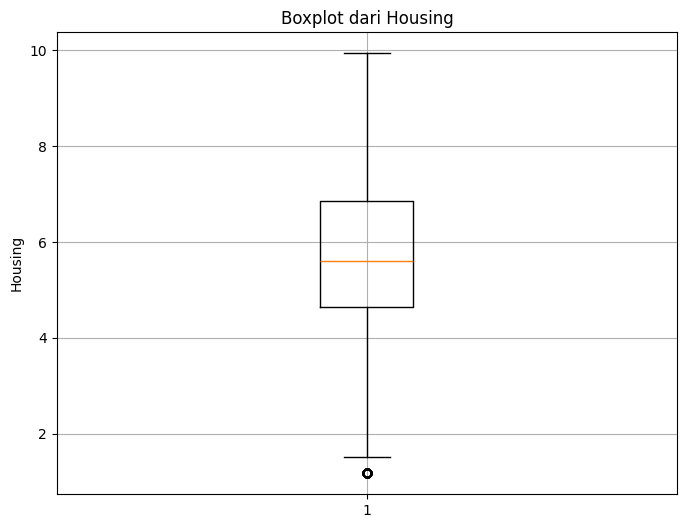

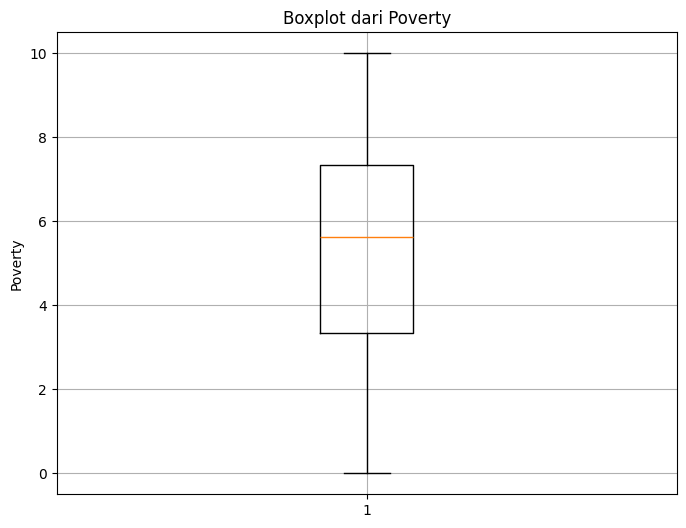

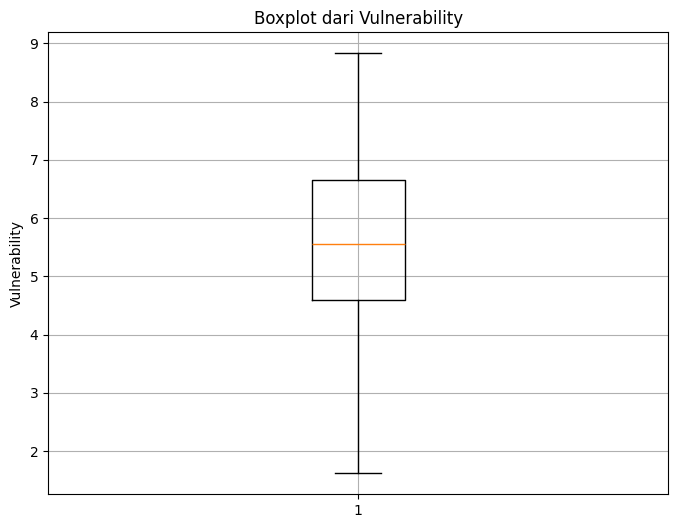

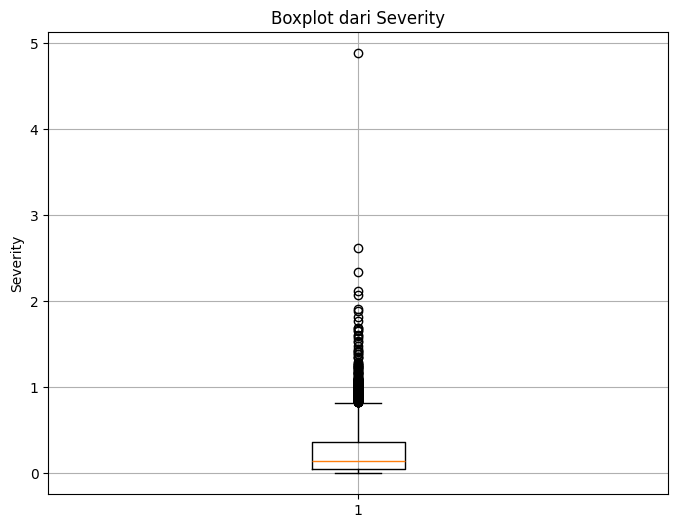

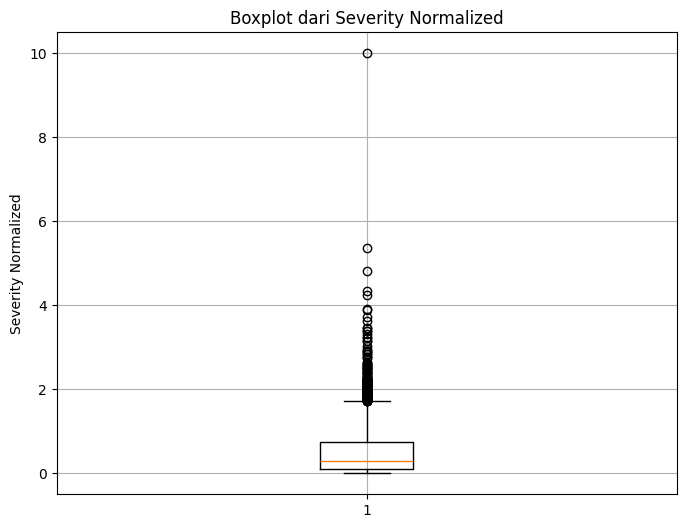

In [9]:
# Memilih kolom yang ingin divisualisasikan sebagai boxplot
columns_for_boxplot = ['Hazard (Intensity)', 'Exposure', 'Housing', 'Poverty', 'Vulnerability', "Severity", "Severity Normalized"]

# Membuat boxplot untuk setiap kolom
for column in columns_for_boxplot:
    plt.figure(figsize=(8, 6))
    plt.boxplot(data[column].dropna())  # Menghilangkan nilai NaN sebelum membuat boxplot
    plt.title(f'Boxplot dari {column}')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

## Memeriksa apakah data memiliki outlier atau tidak

In [10]:
# Fungsi untuk mengatasi outlier dengan menghapus data di luar batas IQR untuk kedua atribut
def handle_outlier(data, columns):
    data_filtered = data.copy()
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        # Menentukan batas bawah dan atas
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Menghapus outlier
        data_filtered = data_filtered[(data_filtered[column] >= lower_bound) & (data_filtered[column] <= upper_bound)]
    
    return data_filtered

# Menggunakan fungsi untuk mengatasi outlier untuk kedua atribut neighbor dan focal
data_cleaned = handle_outlier(data, ['Hazard (Intensity)', 'Exposure','Severity','Severity Normalized'])

# Menampilkan DataFrame setelah outlier dihapus
print("DataFrame setelah menghapus outlier:")
data_cleaned

DataFrame setelah menghapus outlier:


,P_CODE,VDC_NAME,DISTRICT,REGION,Hazard (Intensity),Exposure,Housing,Poverty,Vulnerability,Severity,Severity Normalized,Severity category
483,C-JAN-19-011,Basantapur,Sarlahi,Central,0.29,0.13,4.21,8.35,6.28,0.61,1.2559,Medium-High
498,C-JAN-18-041,Laximiniya,Mahottari,Central,0.31,0.11,4.33,8.62,6.48,0.61,1.2436,Medium-High
505,C-JAN-19-005,Babarganj,Sarlahi,Central,0.28,0.12,4.21,8.35,6.28,0.60,1.2345,Medium-High
513,C-JAN-19-048,Kabilasi,Sarlahi,Central,0.28,0.12,4.21,8.35,6.28,0.60,1.2320,Medium-High
521,C-JAN-18-009,Bardibas,Mahottari,Central,0.25,0.13,4.33,8.62,6.48,0.60,1.2227,Medium-High
...,...,...,...,...,...,...,...,...,...,...,...,...
3979,F-SET-68-048,Khaptad National Par,Bajhang,Far-Western,0.00,0.00,8.74,7.05,7.89,0.00,0.0000,Lowest
3980,F-SET-69-076,Khaptad National Par,Achham,Far-Western,0.00,0.00,8.45,9.21,8.83,0.00,0.0000,Lowest
3981,F-SET-70-052,Khaptad National Park,Doti,Far-Western,0.00,0.00,8.77,8.26,8.52,0.00,0.0000,Lowest
3982,M-BHE-58-033,Royal Bardiya Nation,Bardiya,Mid-Western,0.00,0.00,4.64,4.82,4.73,0.00,0.0000,Lowest


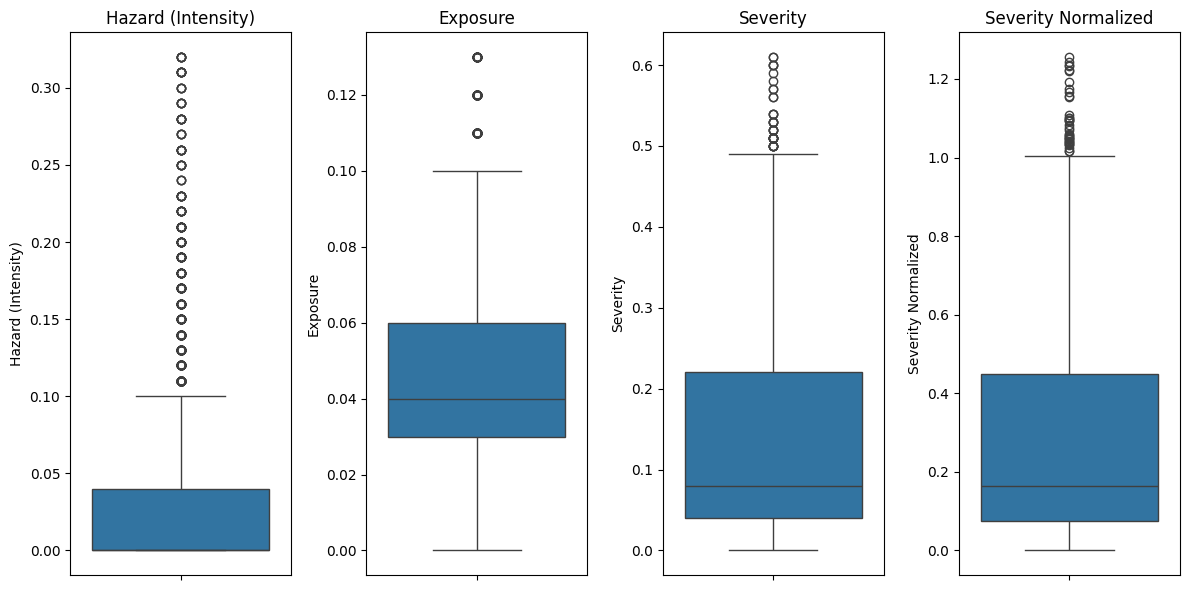

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size
plt.figure(figsize=(12, 6))

# Plot boxplot untuk setiap atribut
plt.subplot(1, 4, 1)
sns.boxplot(y=data_cleaned['Hazard (Intensity)'])
plt.title('Hazard (Intensity)')

plt.subplot(1, 4, 2)
sns.boxplot(y=data_cleaned['Exposure'])
plt.title('Exposure')

plt.subplot(1, 4, 3)
sns.boxplot(y=data_cleaned['Severity'])
plt.title('Severity')

plt.subplot(1, 4, 4)
sns.boxplot(y=data_cleaned['Severity Normalized'])
plt.title('Severity Normalized')

plt.tight_layout()
plt.show()


In [12]:
data.columns

Index(['P_CODE', 'VDC_NAME', 'DISTRICT', 'REGION', 'Hazard (Intensity)',
       'Exposure', 'Housing', 'Poverty', 'Vulnerability', 'Severity',
       'Severity Normalized', 'Severity category'],
      dtype='object')

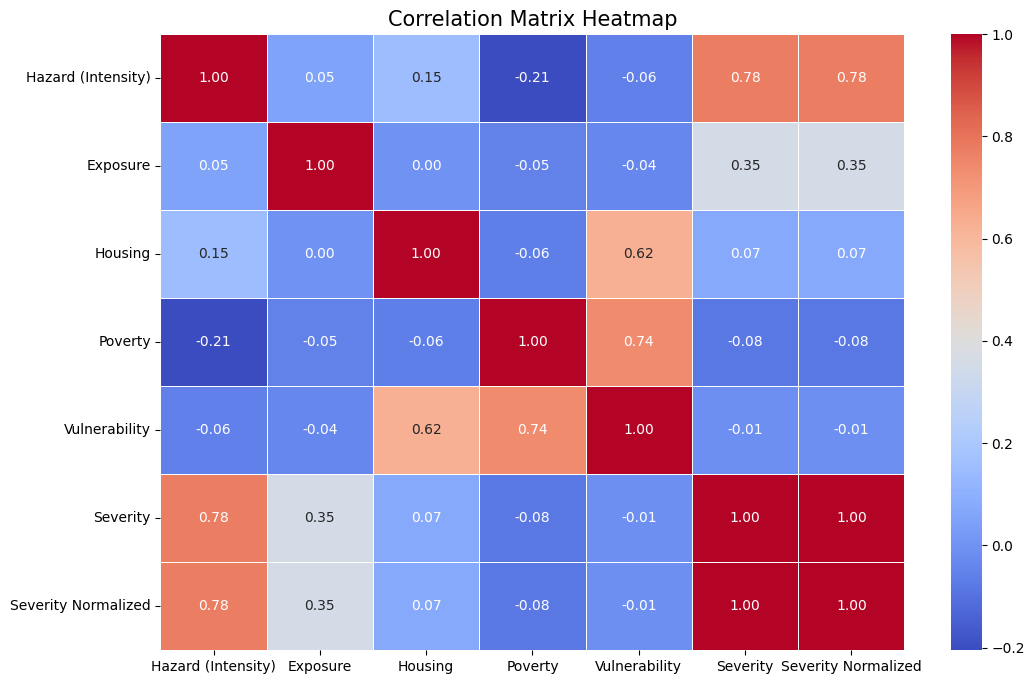

In [13]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Select only numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)

# Set title
plt.title('Correlation Matrix Heatmap', size=15)

# Show the plot
plt.show()

# Transpose Data

In [ ]:
import pandas as pd
# Melakukan transposisi DataFrame
data_transposed = data.transpose()

# Menampilkan DataFrame setelah transposisi
data_transposed

,0,1,2,3,4,5,6,7,8,9,...,3975,3976,3977,3978,3979,3980,3981,3982,3983,3984
P_CODE,C-BAG-27-031,C-BAG-25-027,C-NAR-35-005,C-BAG-26-012,C-BAG-27-028,C-BAG-26-003,W-GAN-36-050,C-JAN-20-025,C-JAN-20-026,C-BAG-27-033,...,E-KOS-06-053,E-SAG-15-116,F-MAH-72-021,F-SET-67-028,F-SET-68-048,F-SET-69-076,F-SET-70-052,M-BHE-58-033,W-LUM-48-075,W-LUM-49-072
VDC_NAME,KathmanduN.P.,LalitpurN.P.,BharatpurN. P.,MadhyapurThimiN.P.,Jorpati,BhaktapurN.P.,PrithbinarayanN.P.,KamalamiN.P.,Kapilakot,KirtipurN.P.,...,Koshi Tappu Wildlife,Koshi Tappu Wildlife,Royal Shuklaphanta,Khaptad National Par,Khaptad National Par,Khaptad National Par,Khaptad National Park,Royal Bardiya Nation,Royal Chitawan Natio,Lumbini Development
DISTRICT,Kathmandu,Lalitpur,Chitawan,Bhaktapur,Kathmandu,Bhaktapur,Gorkha,Sindhuli,Sindhuli,Kathmandu,...,Sunsari,Saptari,Kanchanpur,Bajura,Bajhang,Achham,Doti,Bardiya,Nawalparasi,Rupandehi
REGION,Central,Central,Central,Central,Central,Central,Western,Central,Central,Central,...,Eastern,Eastern,Far-Western,Far-Western,Far-Western,Far-Western,Far-Western,Mid-Western,Western,Western
Hazard (Intensity),2.17,1.72,2.21,2.45,1.91,1.82,3.48,2.54,8.02,1.35,...,0.02,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.84,0.02
Exposure,10.0,2.26,1.47,0.85,0.87,0.84,0.33,0.4,0.12,0.67,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Housing,8.86,8.4,5.38,8.23,8.86,8.23,6.44,5.19,5.19,8.86,...,5.04,1.17,5.46,8.08,8.74,8.45,8.77,4.64,5.61,7.81
Poverty,1.82,0.82,2.53,0.89,1.82,0.89,5.21,6.55,6.55,1.82,...,6.06,6.67,3.08,8.8,7.05,9.21,8.26,4.82,3.51,2.95
Vulnerability,5.34,4.61,3.96,4.56,5.34,4.56,5.83,5.87,5.87,5.34,...,5.55,3.92,4.27,8.44,7.89,8.83,8.52,4.73,4.56,5.38
Severity,4.88,2.62,2.34,2.12,2.07,1.91,1.89,1.82,1.77,1.69,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Label Encoder

In [15]:
from sklearn.preprocessing import LabelEncoder

# Data frame dengan kolom "Severity category"
severity_category = [
    'Highest', 'High', 'Medium-Low', 'Medium-High', 'Low', 'Lowest'
]

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Fit dan transformasi kolom "Severity category" dengan label encoder
encoded_severity_category = label_encoder.fit_transform(severity_category)

# Cetak hasil label encoding
for category, encoded_value in zip(severity_category, encoded_severity_category):
    print(f'{category}: {encoded_value}')

Highest: 1
High: 0
Medium-Low: 5
Medium-High: 4
Low: 2
Lowest: 3


In [16]:
# Ubah urutan label encoding sesuai yang diminta
encoded_severity_category = [5, 4, 2, 3, 1, 0]

# Cetak hasil label encoding
for category, encoded_value in zip(severity_category, encoded_severity_category):
    print(f'{category}: {encoded_value}')

Highest: 5
High: 4
Medium-Low: 2
Medium-High: 3
Low: 1
Lowest: 0


# Standard Scaler (Feature Scalling)

Disini kami hanya memakai Standar Scaler untuk fitur scalling 

In [17]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

# Membaca data dari file CSV
#data = pd.read_csv("nama_file.csv")

# Memilih fitur-fitur numerik yang ingin distandardisasi
numeric_features = ['Hazard (Intensity)', 'Exposure', 'Housing', 'Poverty', 'Vulnerability', 'Severity', 'Severity Normalized']

# Proses standarisasi menggunakan RobustScaler
scaler = RobustScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Menampilkan data setelah distandardisasi
print(data.head())


         P_CODE            VDC_NAME   DISTRICT   REGION  Hazard (Intensity)  \
0  C-BAG-27-031       KathmanduN.P.  Kathmandu  Central           16.615385   
1  C-BAG-25-027        LalitpurN.P.   Lalitpur  Central           13.153846   
2  C-NAR-35-005      BharatpurN. P.   Chitawan  Central           16.923077   
3  C-BAG-26-012  MadhyapurThimiN.P.  Bhaktapur  Central           18.769231   
4  C-BAG-27-028             Jorpati  Kathmandu  Central           14.615385   

   Exposure   Housing   Poverty  Vulnerability   Severity  \
0    248.75  1.470588 -0.945274      -0.101449  15.290323   
1     55.25  1.262443 -1.194030      -0.454106   8.000000   
2     35.50 -0.104072 -0.768657      -0.768116   7.096774   
3     20.00  1.185520 -1.176617      -0.478261   6.387097   
4     20.50  1.470588 -0.945274      -0.101449   6.225806   

   Severity Normalized Severity category  
0            14.928231           Highest  
1             7.813893           Highest  
2             6.949593       

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Memisahkan fitur dan target
features = ['Hazard (Intensity)', 'Exposure', 'Housing', 'Poverty', 'Vulnerability', 'Severity', 'Severity Normalized']
X = data[features]
y = data['Severity category']

In [19]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [20]:
# Inisialisasi dan melatih model SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [21]:
# Melakukan prediksi pada data uji
y_pred = svm_model.predict(X_test)

In [22]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Menampilkan classification report dan confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Akurasi: 0.9874686716791979
Classification Report:
              precision    recall  f1-score   support

        High       0.94      1.00      0.97        15
     Highest       1.00      1.00      1.00         1
         Low       0.99      0.96      0.97        74
      Lowest       1.00      1.00      1.00       178
 Medium-High       1.00      0.98      0.99        54
  Medium-Low       0.96      0.99      0.97        77

    accuracy                           0.99       399
   macro avg       0.98      0.99      0.98       399
weighted avg       0.99      0.99      0.99       399

Confusion Matrix:
[[ 15   0   0   0   0   0]
 [  0   1   0   0   0   0]
 [  0   0  71   0   0   3]
 [  0   0   0 178   0   0]
 [  1   0   0   0  53   0]
 [  0   0   1   0   0  76]]


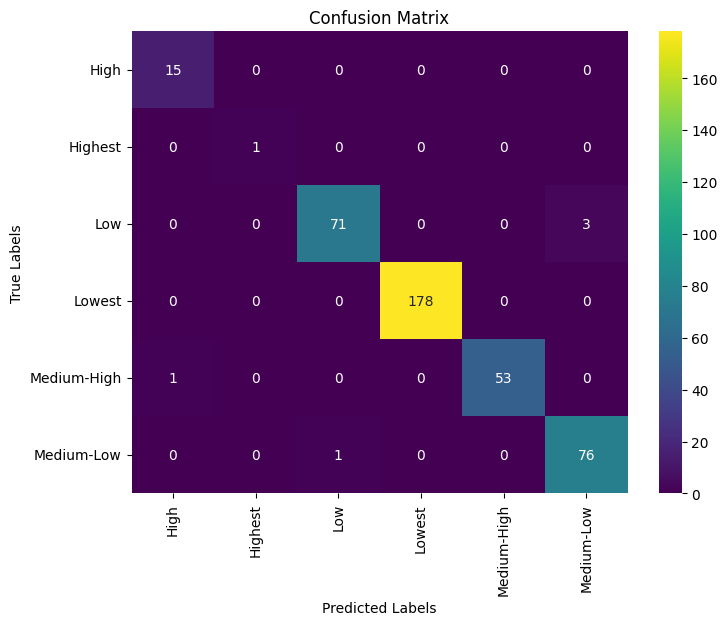

In [23]:
conf_mat = confusion_matrix(y_test, y_pred)

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='viridis', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [44]:
import pickle

# Load the saved model
with open('svm_model.pkl', 'rb') as f:
    svm_model = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'svm_model.pkl'

# Klasterisasi

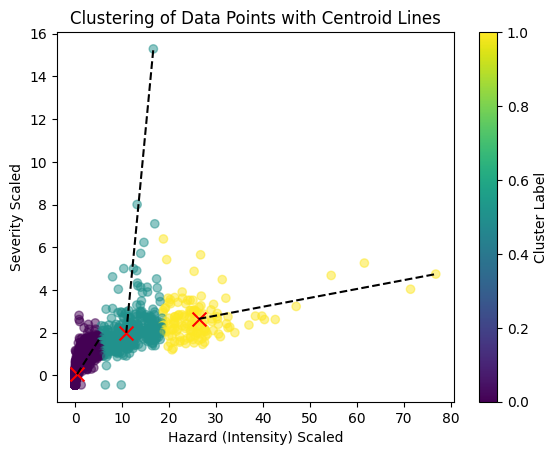

Calinski-Harabasz Index: 11847.040046894044


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Membaca data
data = pd.read_csv("nepal-earthquake-severity-index-latest (1).csv")

# Mengambil fitur yang akan digunakan untuk klastering
X = data.iloc[:, 4:9].values

# Menghitung SSE untuk nilai k dari 1 hingga 10
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Menghitung WSS untuk nilai k dari 1 hingga 10
wss = [sse[0] - ss for ss in sse]

# Menghitung selisih SSE dan WSS
difference = [abs(wss[i] - sse[i]) for i in range(len(wss))]

# Plot SSE dan WSS serta selisihnya
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), sse, marker='o', label='SSE')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE/WSS/Difference')
plt.title('Elbow Method')
plt.xticks(range(1, 11))
plt.legend()
plt.grid(True)

# Menentukan elbow point (di sini digunakan nilai minimum selisih)
elbow_point = difference.index(min(difference)) + 1

# Menambahkan label pada elbow point
plt.annotate('Optimal K',
             xy=(elbow_point, sse[elbow_point - 1]),
             xytext=(elbow_point + 1, sse[elbow_point - 1] + 200),  # Atur posisi teks
             arrowprops=dict(facecolor='black', arrowstyle='->'))   # Tambahkan panah

plt.show()


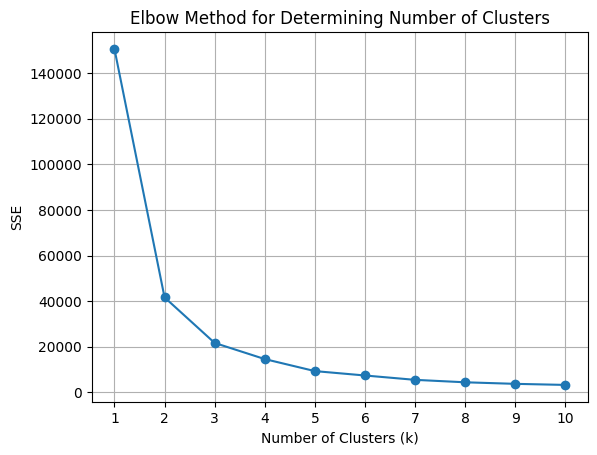

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler

# Membaca data
data = pd.read_csv("nepal-earthquake-severity-index-latest (1).csv")

# Memilih fitur yang akan digunakan untuk klastering
X = data[['Hazard (Intensity)', 'Severity', 'Severity Normalized']]

# Standarisasi data
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Menghitung SSE untuk nilai k dari 1 hingga 10
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot SSE untuk menemukan elbow point
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method for Determining Number of Clusters')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [34]:
from sklearn.cluster import KMeans

optimal_k = 3

# Inisialisasi model K-Means dengan jumlah klaster yang optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=0)  # optimal_k diganti dengan jumlah klaster yang telah ditentukan

# Melakukan klasterisasi pada data
kmeans.fit(X_scaled)  # X_scaled adalah data yang sudah discaling

# Mendapatkan label klaster untuk setiap data poin
cluster_labels = kmeans.labels_

# Mendapatkan pusat klaster
cluster_centers = kmeans.cluster_centers_


NameError: name 'X_scaled' is not defined

In [35]:
import matplotlib.pyplot as plt

# Plot scatter plot dari dua fitur dengan warna berdasarkan label klaster
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', marker='o', alpha=0.5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100)  # Menampilkan pusat klaster
plt.xlabel('Hazard (Intensity) Scaled')
plt.ylabel('Severity Scaled')
plt.title('Clustering of Data Points')
plt.colorbar(label='Cluster Label')
plt.show()


NameError: name 'X_scaled' is not defined

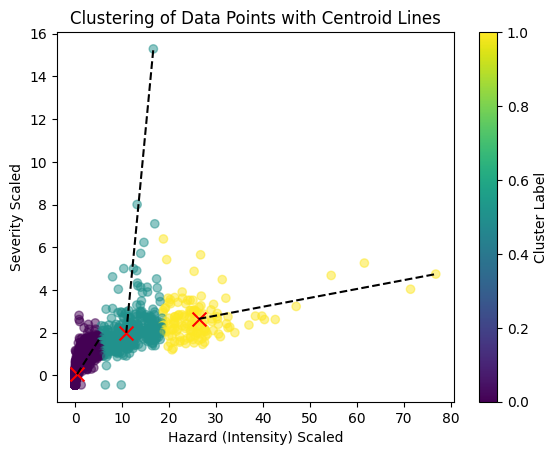

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

# Plot scatter plot dari dua fitur dengan warna berdasarkan label klaster
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', marker='o', alpha=0.5)

# Plot pusat klaster
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100)  

# Tambahkan garis panjang pada centroid
for i, center in enumerate(cluster_centers):
    # Hitung jarak Euclidean dari setiap titik dalam klaster ke pusat klaster
    distances = euclidean_distances(X_scaled[cluster_labels == i], [center])
    # Dapatkan titik terjauh dalam klaster dari pusat klaster
    max_distance_point = X_scaled[cluster_labels == i][np.argmax(distances)]
    # Plot garis vektor dari pusat klaster ke titik terjauh dalam klaster
    plt.plot([center[0], max_distance_point[0]], [center[1], max_distance_point[1]], c='black', linestyle='--')

plt.xlabel('Hazard (Intensity) Scaled')
plt.ylabel('Severity Scaled')
plt.title('Clustering of Data Points with Centroid Lines')
plt.colorbar(label='Cluster Label')
plt.show()


In [39]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans

# Membaca dataset
data = pd.read_csv("nepal-earthquake-severity-index-latest (1).csv")

# Memilih fitur yang akan di-scaling dan klastering
fitur = data[['Hazard (Intensity)', 'Exposure', 'Housing', 'Poverty', 'Vulnerability', 'Severity', 'Severity Normalized']]

# Inisialisasi RobustScaler
scaler = RobustScaler()

# Melakukan scaling pada data fitur
fitur_scaled = scaler.fit_transform(fitur)

# Mengubah hasil scaling menjadi dataframe
fitur_scaled_df = pd.DataFrame(fitur_scaled, columns=fitur.columns)

# Menentukan jumlah klaster yang diinginkan
n_clusters = 3  # Misalnya, kita akan membuat 3 klaster

# Inisialisasi dan pelatihan model KMeans
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(fitur_scaled_df)

# Menambahkan kolom label klaster ke dalam dataset
data['Cluster'] = kmeans.labels_

# Menampilkan hasil klastering
print("Hasil Klastering:")
print(data.head())


Hasil Klastering:
         P_CODE            VDC_NAME   DISTRICT   REGION  Hazard (Intensity)  \
0  C-BAG-27-031       KathmanduN.P.  Kathmandu  Central                2.17   
1  C-BAG-25-027        LalitpurN.P.   Lalitpur  Central                1.72   
2  C-NAR-35-005      BharatpurN. P.   Chitawan  Central                2.21   
3  C-BAG-26-012  MadhyapurThimiN.P.  Bhaktapur  Central                2.45   
4  C-BAG-27-028             Jorpati  Kathmandu  Central                1.91   

   Exposure  Housing  Poverty  Vulnerability  Severity  Severity Normalized  \
0     10.00     8.86     1.82           5.34      4.88              10.0000   
1      2.26     8.40     0.82           4.61      2.62               5.3707   
2      1.47     5.38     2.53           3.96      2.34               4.8083   
3      0.85     8.23     0.89           4.56      2.12               4.3447   
4      0.87     8.86     1.82           5.34      2.07               4.2407   

  Severity category  Cluster  
0

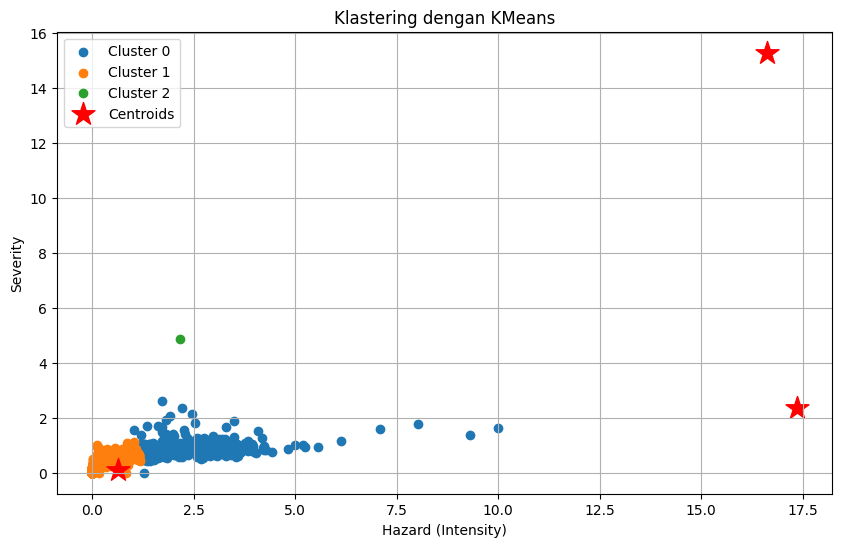

In [37]:
# Visualisasi hasil klastering
plt.figure(figsize=(10, 6))
# Plot setiap klaster
for cluster in range(n_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Hazard (Intensity)'], cluster_data['Severity'], label=f'Cluster {cluster}')

# Plot pusat klaster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 5], s=300, c='red', marker='*', label='Centroids')

plt.title('Klastering dengan KMeans')
plt.xlabel('Hazard (Intensity)')
plt.ylabel('Severity')
plt.legend()
plt.grid(True)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4c308968-6a01-461a-99a4-5c527286ebca' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>